## **Setup** 🔧

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd /content/drive/MyDrive/CSE519/NYSE

/content/drive/MyDrive/CSE519/NYSE


# Download data from Kaggle 📥

In [6]:
!pip install -q kaggle

In [8]:
# Go to your Kaggle account and navigate to your account settings (click on your profile picture -> "Account").
# Scroll down to the "API" section and click "Create New API Token." This will download a kaggle.json file containing your API key.
# In your Colab notebook, run the following code to upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"venkatachaitanyajana","key":"80cf0b1ccaa5661937cc4fc749191e8b"}'}

In [9]:
! mkdir ~/.kaggle

In [10]:
! cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets download -d dgawlik/nyse

Dataset URL: https://www.kaggle.com/datasets/dgawlik/nyse
License(s): CC0-1.0
 98% 30.0M/30.7M [00:00<00:00, 91.8MB/s]
100% 30.7M/30.7M [00:00<00:00, 81.4MB/s]


# Alternate: download data using gdown (if having issues with Kaggle) 📁

In [12]:
!pip install gdown

In [13]:
# change
import gdown
url = 'https://drive.google.com/uc?id=1Z2raUyVZpAyICdv193t22YCT5bS9oEba'
gdown.download(url)

Downloading...
From (original): https://drive.google.com/uc?id=1Z2raUyVZpAyICdv193t22YCT5bS9oEba
From (redirected): https://drive.google.com/uc?id=1Z2raUyVZpAyICdv193t22YCT5bS9oEba&confirm=t&uuid=b1f32d07-39dd-44c1-b2bc-e6b2213f55b8
To: /content/drive/MyDrive/CSE519/NYSE/nyse.zip
100%|██████████| 32.1M/32.1M [00:00<00:00, 37.4MB/s]


'nyse.zip'

# Extract data and install packages (regardless of data acquisition method) 🚀

In [14]:
!unzip nyse.zip

Archive:  nyse.zip
replace fundamentals.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fundamentals.csv        
replace prices-split-adjusted.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: prices-split-adjusted.csv  
replace prices.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: prices.csv              
replace securities.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: securities.csv          


In [15]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
### END

## **Library and Data Imports**
- Import your libraries and the data here

In [16]:
### TODO: Load required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
###

## **Q1: Market Entry and Exit Dynamics Analysis (10 Points)**
Identify which companies in the dataset entered after data collection started (presumably new companies) and which left the exchange before the end date for data collection (perhaps going bankrupt)

In [17]:
prices_df = pd.read_csv('prices.csv')
prices_adjusted_df = pd.read_csv('prices-split-adjusted.csv')

In [18]:

prices_df['date'] = pd.to_datetime(prices_df['date'], format='mixed')

# removing time component
prices_df['date'] = prices_df['date'].dt.strftime('%Y-%m-%d')

prices_adjusted_df['date'] = pd.to_datetime(prices_adjusted_df['date'], format='mixed')

# removing time component
prices_adjusted_df['date'] = prices_adjusted_df['date'].dt.strftime('%Y-%m-%d')


In [19]:
overall_start = prices_df['date'].min()
overall_end = prices_df['date'].max()

print('overall_start, overall_end times')
print(overall_start, overall_end)

company_dates = prices_df.groupby('symbol')['date'].agg(first_appearance='min', last_appearance='max')

new_companies = company_dates[company_dates['first_appearance'] > overall_start]

exited_companies = company_dates[company_dates['last_appearance'] < overall_end]

print("New companies that entered after data collection started:")
print('new_companies count', len(new_companies))
display(new_companies)

print("Companies that left the exchange before the end date")
print('bankrupt companies count', len(exited_companies))
display(exited_companies)

overall_start, overall_end times
2010-01-04 2016-12-30
New companies that entered after data collection started:
new_companies count 34


,first_appearance,last_appearance
symbol,,
ABBV,2013-01-02,2016-12-30
ALLE,2013-11-18,2016-12-30
CFG,2015-01-02,2016-12-30
CHTR,2010-01-05,2016-12-30
COTY,2013-06-13,2016-12-30
CSRA,2015-11-16,2016-12-30
DLPH,2013-01-02,2016-12-30
EVHC,2013-08-14,2016-12-30
FB,2013-01-02,2016-12-30


Companies that left the exchange before the end date
bankrupt companies count 0


,first_appearance,last_appearance
symbol,,


## **Q2: Ranking and Sampling (10 Points)**
Order the companies by how big/interesting/important they are, so we can restrict    analysis to the top n companies to work with to keep future computations reasonable.  Describe what ranking feature you think best here and why, and what n works for you for future analysis **given your limited compute environment**.

In [20]:
fundamentals_df = pd.read_csv('fundamentals.csv')

In [21]:

fundamentals_df['Market Cap'] = fundamentals_df['Earnings Per Share'] * fundamentals_df['Estimated Shares Outstanding']


fundamentals_df.sort_values(by=['Ticker Symbol', 'For Year'], inplace=True)

# keeping only the last entry
latest_market_caps = fundamentals_df.drop_duplicates(subset=['Ticker Symbol'], keep='last').copy()

latest_market_caps['Market Cap Rank'] = latest_market_caps['Market Cap'].rank(ascending=False)

sorted_df = latest_market_caps.sort_values(by='Market Cap Rank')
display(sorted_df[['Ticker Symbol', 'For Year', 'Market Cap', 'Market Cap Rank']])

,Ticker Symbol,For Year,Market Cap,Market Cap Rank
11,AAPL,2016.0,4.568700e+10,1.0
886,JPM,2015.0,2.444200e+10,2.0
1685,WFC,2015.0,2.289400e+10,3.0
691,GILD,2015.0,1.810800e+10,4.0
1669,VZ,2015.0,1.787900e+10,5.0
...,...,...,...,...
1693,WHR,NaN,NaN,NaN
1697,WLTW,2015.0,NaN,NaN
1701,WM,NaN,NaN,NaN
1710,WRK,NaN,NaN,NaN


In [22]:
top_n_companies = sorted_df.iloc[:100]['Ticker Symbol'].tolist() #sorted_df.head(50)

print("Top 100 Companies:")
print(top_n_companies)

Top 100 Companies:
['AAPL', 'JPM', 'WFC', 'GILD', 'VZ', 'C', 'MSFT', 'XOM', 'WMT', 'T', 'IBM', 'CSCO', 'DIS', 'AAL', 'KO', 'UAL', 'MDLZ', 'HD', 'PFE', 'QCOM', 'PRU', 'MET', 'MO', 'UPS', 'CVX', 'MCD', 'LYB', 'MRK', 'ABT', 'PSX', 'PNC', 'COF', 'VLO', 'NKE', 'LVLT', 'TGT', 'DHR', 'BK', 'TXN', 'MPC', 'CB', 'SBUX', 'DUK', 'NEE', 'ANTM', 'PCLN', 'LOW', 'AFL', 'SYMC', 'SO', 'LLY', 'COST', 'DFS', 'TJX', 'MCK', 'AIG', 'ALL', 'SPG', 'HCA', 'CI', 'BBT', 'KR', 'TEL', 'ETN', 'TMO', 'STI', 'D', 'FDX', 'AMAT', 'GIS', 'HIG', 'PEG', 'EMR', 'CTSH', 'PCAR', 'MMC', 'BMY', 'AMP', 'PX', 'TSO', 'CCI', 'SCHW', 'VIAB', 'ABC', 'CAH', 'AON', 'CL', 'SRE', 'MON', 'YUM', 'PGR', 'LB', 'CME', 'AZO', 'XL', 'DG', 'EA', 'EIX', 'EL', 'MTB']


Discussion for Q2:
I chose Market Capitalization to rank the companies because it shows how big and financially stable companies are. Larger companies with high market cap are usually more stable and important in the market, so they will be good candidates for analysis. This measure is commonly used (S&P) to group companies into large, medium, and small sizes. Even though S&P 500 ranking is a bit more complex than this, I wanted to keep it simple and consider only the biggest factor (KISS).

I used n = 100 for further analysis.

## **Q3: Stock Split Analysis (15 Points)**
There are two datafiles, one with raw prices, the other adjusted by stock splits.   Compare the pre-and-post split files to see if you can identify the dates/companies of the roughly 140 stock splits and what the ratio of each of the splits were.

In [23]:
prices_copy = prices_df.copy()
prices_adjusted_copy = prices_adjusted_df.copy()

merged_df = pd.merge(prices_copy,
                     prices_adjusted_copy,
                     on=['symbol', 'date'],
                     suffixes=('_raw', '_adjusted'))

# calculating the adjustment factor (adjusted_close / raw_close)
merged_df['adjustment_factor'] = merged_df['close_adjusted'] / merged_df['close_raw']

merged_df = merged_df.sort_values(['symbol', 'date']).reset_index(drop=True)

# calculating the change in adjustment factor
merged_df['adjustment_factor_change'] = merged_df.groupby('symbol')['adjustment_factor'].shift(1) / merged_df['adjustment_factor']

# previous day's close prices
merged_df['previous_close_raw'] = merged_df.groupby('symbol')['close_raw'].shift(1)
merged_df['previous_close_adjusted'] = merged_df.groupby('symbol')['close_adjusted'].shift(1)


split_threshold_low = 0.9999
split_threshold_high = 1.01
merged_df['is_stock_split'] = (merged_df['adjustment_factor_change'] < split_threshold_low) | (merged_df['adjustment_factor_change'] > split_threshold_high)


merged_df['split_ratio'] = merged_df.apply(
    lambda row: round(1 / row['adjustment_factor_change'], 2) if row['is_stock_split'] else None,
    axis=1
)


stock_splits_count = merged_df['is_stock_split'].sum()
print(f"Total number of stock splits: {stock_splits_count}")

stock_splits_df = merged_df[merged_df['is_stock_split']]
display(stock_splits_df[['date', 'symbol', 'previous_close_raw', 'previous_close_adjusted', 'split_ratio']])


Total number of stock splits: 130


,date,symbol,previous_close_raw,previous_close_adjusted,split_ratio
1217,2014-11-03,A,55.279998,39.542202,1.40
6400,2014-06-09,AAPL,645.570023,92.224289,7.00
10572,2013-01-02,ABT,65.499944,31.426873,2.08
19822,2014-10-01,ADP,83.080005,72.941181,1.14
45614,2012-03-19,ALK,69.790001,17.447500,2.00
...,...,...,...,...,...
802946,2010-07-02,VZ,28.129890,26.385527,1.07
810161,2011-03-02,WEC,58.639999,29.320000,2.00
814249,2013-05-30,WFM,105.410004,52.705002,2.00
819434,2012-01-03,WMB,33.019920,26.917839,1.23


Discussion for Q3:
I used the adjusted close prices  and raw close prices to detect stock splits. I first calculated an adjustment factor (adjusted close divided by raw close) and then calculated change in adjustment factor (adjustment_factor (yesterday's)/adjustment_factor(today)). We can spot splits, if the factor changes drastically—either dropping below 0.9 or rising above 1.01—it signals a stock split. Using this method, I identified the dates and companies involved in the splits and calculated the split ratios.

I used this reference: https://quant.stackexchange.com/questions/7526/how-to-detect-and-adjust-for-stock-splits

## **Q4: Pairs Trading Strategy and Correlation Analysis (20 Points)**
Pairs trading is an investment strategy which relies on identifying pairs of stocks which move in the same direction each day – if stock A goes up (down) on a given day, then stock B likely goes up (down) the same day.   So:

<ol type="a">
 <li>Construct an appropriate daily time series for each stock reflecting how much it goes up or down each day.</li>
 <li>Construct a pairwise correlation matrix measuring how in sync these movements are among all pairs of your n top stocks.   Present this pairwise correlation matrix in a way to make its lesson as clear as possible to the viewer.</li>
 <li>Identify which pairs are most and least strongly correlated in their movements, and propose some reasonable explanations why this is the case.</li>
 <li> The 'securities.csv' file contains the economic sector which each company participates in.  Do companies within the same economic sector have stronger or weaker price correlations than those in different sectors? </li>
</ol>



### **Part a**

In [24]:
prices_sorted_df = prices_df.sort_values(by='date', inplace=False)

# using percentage change in close price
prices_sorted_df['daily_return'] = prices_sorted_df.groupby('symbol')['close'].pct_change() * 100

prices_sorted_df.dropna(subset=['daily_return'], inplace=True)

# prices_sorted_grouped_df = prices_sorted_df.groupby('symbol')

# for symbol, group in prices_sorted_grouped_df:
#     print(f"\nData for Symbol: {symbol}")
#     display(group[['date', 'symbol', 'close', 'daily_return']])


###**Part b**

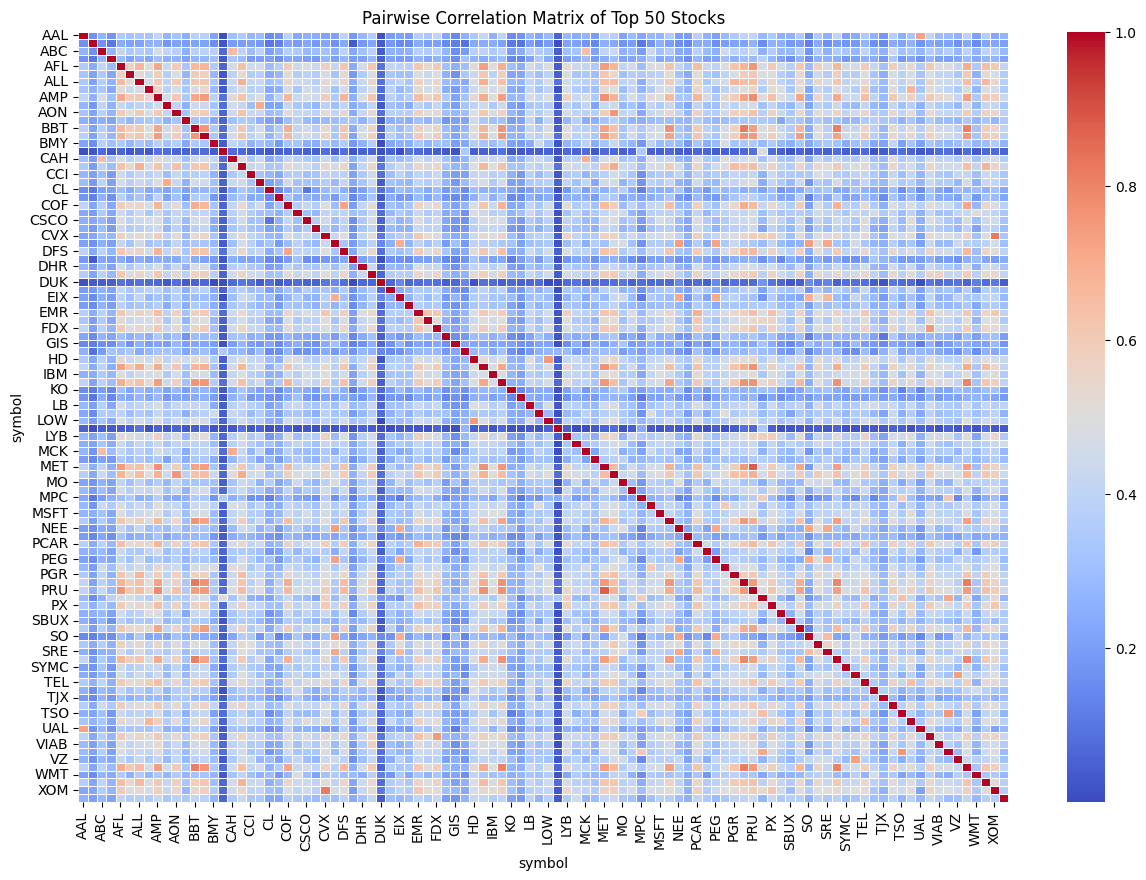

In [26]:
prices_sorted_df = prices_sorted_df[prices_sorted_df['symbol'].isin(top_n_companies)]

prices_pivot_df = prices_sorted_df.pivot(index='date', columns='symbol', values='daily_return')

correlation_matrix = prices_pivot_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Pairwise Correlation Matrix of Top 50 Stocks')
plt.show()


### **Part c**

In [27]:
correlation_list = []

for row_idx, row in correlation_matrix.iterrows():
    for col_idx, value in row.items():
        if row_idx != col_idx:
            correlation_list.append((row_idx, col_idx, value))

correlation_df = pd.DataFrame(correlation_list, columns=['Stock1', 'Stock2', 'Correlation'])
# display(correlation_df)

# removing duplicates
correlation_df = correlation_df.loc[correlation_df['Stock1'] < correlation_df['Stock2']]
# display(correlation_df)

most_correlated = correlation_df.sort_values(by='Correlation', ascending=False).head(10)

# I didn't find close to zero but just used ascending order because my top n comapanies all have more than 0 correlation
least_correlated = correlation_df.sort_values(by='Correlation', ascending=True).head(10)

print("Most Correlated Pairs:")
display(most_correlated)
print("Least Correlated Pairs:")
display(least_correlated)


Most Correlated Pairs:


,Stock1,Stock2,Correlation
5615,MET,PRU,0.877361
1258,BBT,PNC,0.822505
2671,CVX,XOM,0.820285
7123,PNC,WFC,0.812849
1268,BBT,STI,0.811880
1282,BBT,WFC,0.808909
4549,JPM,WFC,0.803190
8113,STI,WFC,0.802083
7109,PNC,STI,0.793626
863,AMP,PRU,0.783734


Least Correlated Pairs:


,Stock1,Stock2,Correlation
3217,DUK,LOW,0.000418
1417,BMY,DUK,0.000726
3218,DUK,LVLT,0.002636
5101,LVLT,MCD,0.003228
2902,DG,DUK,0.003624
2030,CL,LVLT,0.004577
149,AAPL,LVLT,0.004953
2921,DG,LVLT,0.006497
1535,C,LVLT,0.006789
3257,DUK,UAL,0.007094


Explanations for part c: The most correlated stock pairs, like MET and PRU or CVX and XOM, are from the same industry and are affected by similar factors, which causes their prices to move together. On the other hand, the least correlated pairs, like DUK and LOW or BMY and DUK, come from completely different industries and are influenced by different things, so their stock prices don’t move in the same way. Companies in the same industry tend to behave similarly, while those in different industries react to different events, which explains the difference in how their stock prices move.

### **Part d**

In [28]:
securities_df = pd.read_csv('securities.csv')

sector_map = dict(zip(securities_df['Ticker symbol'], securities_df['GICS Sector']))

sec_correlation_matrix = prices_pivot_df.corr()

intra_sector_corrs = []
inter_sector_corrs = []

for stock1 in sec_correlation_matrix.columns:
    for stock2 in sec_correlation_matrix.columns:
        if stock1 != stock2:
            if sector_map[stock1] == sector_map[stock2]:
                intra_sector_corrs.append(sec_correlation_matrix.loc[stock1, stock2])
            else:
                inter_sector_corrs.append(sec_correlation_matrix.loc[stock1, stock2])

avg_intra_sector_corr = np.mean(intra_sector_corrs)
avg_inter_sector_corr = np.mean(inter_sector_corrs)

print(f"Average Intra-Sector Correlation: {avg_intra_sector_corr}")
print(f"Average Inter-Sector Correlation: {avg_inter_sector_corr}")


Average Intra-Sector Correlation: 0.4776773335546987
Average Inter-Sector Correlation: 0.33290689299107973


Insights from part d: The result shows that companies in the same sector have prices that move together more closely than companies in different sectors. The average correlation for companies within the same sector is higher (0.478) than for companies in different sectors (0.333). This means that companies in the same sector are more affected by similar events and trends.

## **Q5: Distribution of Daily Price Movements  (10 Points)**
Plot the distributions of frequency of daily price movements according to your statistic.   What type of classical distribution does this look like, and are there any surprising deviations from the theoretical distribution?

Minimum Daily Return: -0.6189337978037869
Maximum Daily Return: 2.0961029229406556


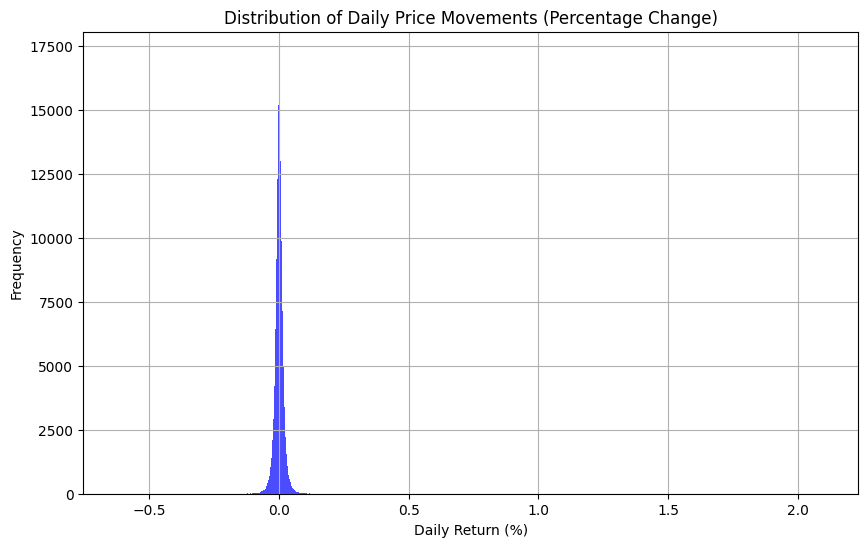

In [29]:
prices_analysis_df = prices_adjusted_df.copy(deep=True)

# using percentage change in close price
prices_analysis_df['daily_return'] = prices_analysis_df.groupby('symbol')['close'].pct_change()

# removing nans
prices_analysis_df.dropna(subset=['daily_return'], inplace=True)

min_return = prices_analysis_df['daily_return'].min()
max_return = prices_analysis_df['daily_return'].max()

print(f"Minimum Daily Return: {min_return}")
print(f"Maximum Daily Return: {max_return}")

# display(prices_analysis_df)

plt.figure(figsize=(10, 6))
plt.hist(prices_analysis_df['daily_return'], bins=5000, color='blue', alpha=0.7)
plt.title('Distribution of Daily Price Movements (Percentage Change)')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Answer for Q5: This distribution looks like Gaussian distribution with most daily price changes close to zero. But there's something unusual: the biggest daily increase is larger than the biggest daily drop. This suggests that the stock market generally experiences more significant upward movements, indicating an upward trend.

## **Q6: Exploratory Data Analysis (15 Points)**
Create three plots of your own using the dataset that you think reveal something very interesting. Explain what it is, and anything else you learned from your exploration.

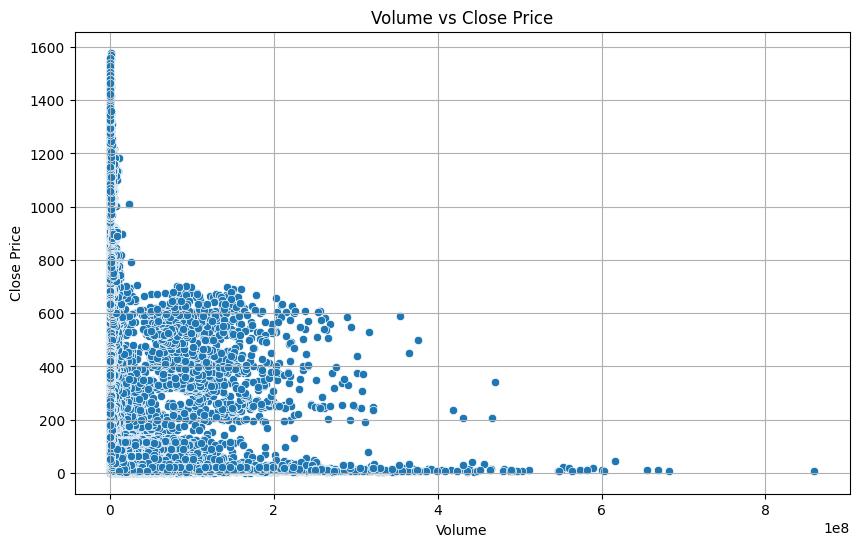

In [30]:
## Plot 1

# Plotting volume vs close
plt.figure(figsize=(10, 6))
sns.scatterplot(data=prices_df, x='volume', y='close')
plt.title('Volume vs Close Price')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


This plot shows that even when trading volume is low, some stocks still have very high prices. For example, we see points where the volume is low but prices are over $1000. This means high-value stocks don’t need a lot of trades to keep their value. On the other hand, high trading volume doesn’t always mean high prices. This shows that price and trading activity aren’t always connected.

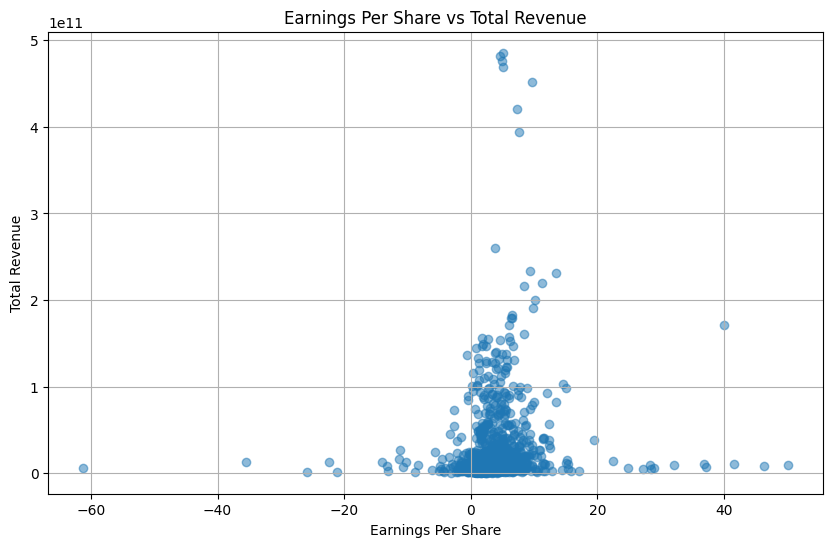

In [31]:
## Plot 2

plt.figure(figsize=(10, 6))
plt.scatter(fundamentals_df['Earnings Per Share'], fundamentals_df['Total Revenue'], alpha=0.5)
plt.title('Earnings Per Share vs Total Revenue')
plt.xlabel('Earnings Per Share')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()



This plot shows that high revenue doesn't always mean high earnings. Most companies have low EPS, even with decent revenue. Some companies have high revenue but negative EPS, showing they're making losses despite selling a lot.

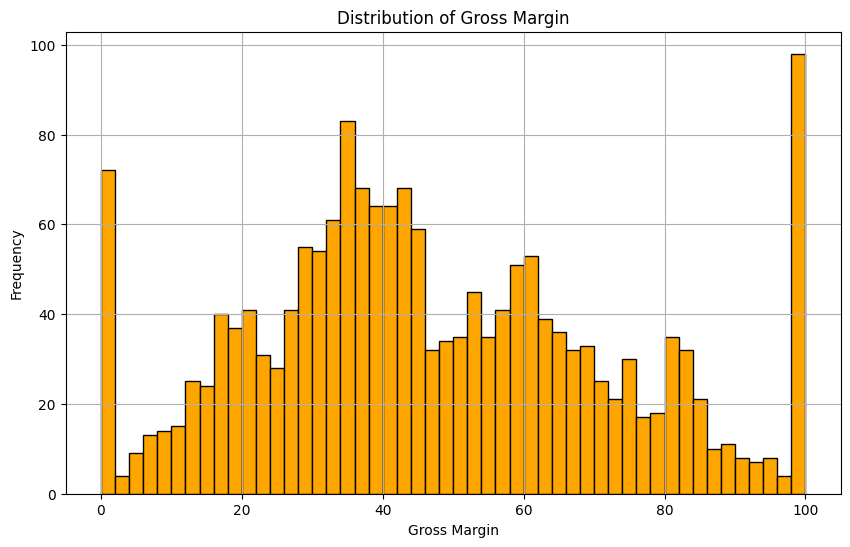

In [32]:
## Plot 3

# histogram for 'Gross Margin'
plt.figure(figsize=(10, 6))
plt.hist(fundamentals_df['Gross Margin'], bins=50, color='orange', edgecolor='black')
plt.title('Distribution of Gross Margin')
plt.xlabel('Gross Margin')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


This plot is interesting because, unlike many other financial metrics that are heavily skewed, the 'Gross Margin' is more evenly spread across a wide range. The high bars at the edges, especially at 0 and 100, are unusual and indicate that there are quite a few companies with either very low or very high gross margins. This makes 'Gross Margin' unique compared to other metrics, which is why it caught my attention.

## **Q7: Predicting Earnings Per Share - Linear Regression (10 Points)**
The fundamentals.csv file contains four years worth of profitability data on each of the companies.   Perhaps the most important number to reflect how profitable the company is the earnings per share.    There are two predictive tasks here:
<ol type="i">
<li> Use linear regression to predict the earnings per share for company X in year Y using the other variables from foundations.csv for year Y. </li>
<li> Use linear regressions to predict the earnings per share for company X in year Y using the variables from foundations.csv for year Y-1.</li>
</ol>

How good are these models and how can you tell?


### **Task i**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data = fundamentals_df.copy()

data.drop(['Unnamed: 0', 'Ticker Symbol', 'Period Ending'], axis=1, inplace=True)

data.fillna(data.mean(), inplace=True)


features = data.drop('Earnings Per Share', axis=1)
target = data['Earnings Per Share']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {model.score(X_test, y_test)}")

Root Mean Squared Error: 3.7700333397251407
R-squared: 0.3722645733758264


### **Task ii**

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fundamentals_df = pd.read_csv('fundamentals.csv')

data = fundamentals_df.copy()

numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

# filling missing values only for numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())


data['Next Year EPS'] = data.groupby('Ticker Symbol')['Earnings Per Share'].shift(-1)
# display(data)

data.dropna(subset=['Next Year EPS'], inplace=True)
# display(data)

columns_to_drop = ['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Earnings Per Share', 'For Year']
data.drop(columns=columns_to_drop, axis=1, inplace=True)

features = data.drop('Next Year EPS', axis=1)
target = data['Next Year EPS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error: {rmse}")

r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")


Root Mean Squared Error: 3.6707233871387537
R-squared: -0.1711278931540734


Conclusion for Q7: The first model is better because it does a decent job of explaining the data, even though the second model has a slightly lower error. The negative R-squared in the second model shows that it is performing worse than using the average as a predictor. So, it’s not doing a good job in understanding the data.

## **Q8: Advanced Modeling Techniques (10 Points)**
Now repeat this exercise to try to build better models for parts i and ii.    I bet that (hint) improved data preparation/normalization/feature engineering will help.  Maybe an algorithm other than linear regression (e.g. Random Forest, Nearest Neighbor, etc) will prove better training.

\[Note: [scikit-learn](https://scikit-learn.org/stable/) is a user-friendly library which is used to perform data loading, pre-processing, transformations, algorithms and metrics needed for Data Science and Machine learning\]  

Compare their performance and explain your reasoning for the differences in their performances.

In [35]:
key_columns_eps = [
    "Net Income",
    "Net Income Applicable to Common Shareholders",
    "Net Income-Cont. Operations",
    "Total Revenue",
    "Gross Profit",
    "Operating Income",
    "Earnings Before Interest and Tax",
    "Earnings Before Tax",
    "Profit Margin",
    "Operating Margin",
    "Gross Margin",
    "Cost of Revenue",
    "Sales, General and Admin.",
    "Interest Expense",
    "Income Tax",
    "Common Stocks",
    "Treasury Stock",
    "Estimated Shares Outstanding",
    "Retained Earnings",
    "Net Cash Flow",
    "Net Cash Flow-Operating",
    "Net Cash Flows-Financing",
    "Net Cash Flows-Investing",
    "Liabilities",
    "Long-Term Debt",
    "Short-Term Debt / Current Portion of Long-Term Debt",
    "Current Ratio",
    "Quick Ratio",
    "Cash Ratio",
    "Add'l income/expense items",
    "Equity Earnings/Loss Unconsolidated Subsidiary",
    "Non-Recurring Items"
]

## Task i

In [36]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


data = fundamentals_df.copy()

data.drop(['Unnamed: 0', 'Ticker Symbol', 'Period Ending'], axis=1, inplace=True)

data.fillna(data.mean(), inplace=True)

# feature engineering
data['Net Income per Share'] = data['Net Income'] / data['Estimated Shares Outstanding']
data['Dividends per Share'] = data.get('Dividends', 0) / data['Estimated Shares Outstanding']

# ensuring no division by zero or inf values
data.replace([float('inf'), -float('inf')], 0, inplace=True)
data['Net Income per Share'].fillna(0, inplace=True)
data['Dividends per Share'].fillna(0, inplace=True)

# filtering only the key columns for features and include the new features
features_unscaled = data[key_columns_eps + ['Net Income per Share', 'Dividends per Share']]  # Include the new features

target = data['Earnings Per Share']

# data normalization
scaler = StandardScaler()
features = scaler.fit_transform(features_unscaled)

features = pd.DataFrame(features, columns=features_unscaled.columns)

<ipython-input-36-1db3f1c5b766>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Income per Share'].fillna(0, inplace=True)
<ipython-input-36-1db3f1c5b766>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# # Linear Regression Model
# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# lr_predictions = lr_model.predict(X_test)

# # Evaluation
# lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
# lr_r2 = r2_score(y_test, lr_predictions)

# print(f"Linear Regression RMSE: {lr_rmse}")
# print(f"Linear Regression R-squared: {lr_r2}")

from sklearn.ensemble import RandomForestRegressor

# Random Forest Model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print(f"RMSE: {rf_rmse}")
print(f"R-squared: {rf_r2}")



RMSE: 1.4865801347374905
R-squared: 0.9022726110028237


## Task ii

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

fundamentals_df = pd.read_csv('fundamentals.csv')

data = fundamentals_df.copy()

numerical_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(exclude=['number']).columns

data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

data['Next Year EPS'] = data.groupby('Ticker Symbol')['Earnings Per Share'].shift(-1)

data.dropna(subset=['Next Year EPS'], inplace=True)

# feature engineering
data['Net Income per Share'] = data['Net Income'] / data['Estimated Shares Outstanding']
data['Dividends per Share'] = data.get('Dividends', 0) / data['Estimated Shares Outstanding']

data.replace([float('inf'), -float('inf')], 0, inplace=True)
data['Net Income per Share'].fillna(0, inplace=True)
data['Dividends per Share'].fillna(0, inplace=True)

# Drop unnecessary columns and any that would cause data leakage
columns_to_drop = ['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Earnings Per Share', 'For Year']
data.drop(columns=columns_to_drop, axis=1, inplace=True)


features_unscaled = data.drop('Next Year EPS', axis=1)
target = data['Next Year EPS']

# data normalization
scaler = StandardScaler()
features = scaler.fit_transform(features_unscaled)

features = pd.DataFrame(features, columns=features_unscaled.columns)


<ipython-input-38-f60569f0f8f4>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Net Income per Share'].fillna(0, inplace=True)
<ipython-input-38-f60569f0f8f4>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_r2 = r2_score(y_test, knn_predictions)

print(f"RMSE: {knn_rmse}")
print(f"R-squared: {knn_r2}")

RMSE: 2.594625762130441
R-squared: 0.41487256831983077


Conclusion for Q8: Obviously, Q8 models performed better than naive linear reg models from Q7. I did feature engineering (added new features), scaling of variables and used better models (KNN and Random Forest Regressor). Coming to the performance comparision between part i and part ii, in both RMSE and R-square metrics, part i performed very well. This might be because part i used data from the same year to predict earnings per share, making it more accurate. In contrast, part ii used data from the previous year, which might not reflect the current situation of the company, leading to less accurate predictions

In [ ]:
# end